In [1]:
import numpy as np
import pandas as pd
import seaborn as snsr
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , f1_score , classification_report , precision_score, recall_score, f1_score
import warnings 

from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB


In [19]:
data = pd.read_csv("D:/2aaaaaathirdimprtant/pattern/patternProject Disease Classifier_Training Part.csv")


In [20]:
data.head(10)


,Condition,has_fever,has_Cough,has_Fatigue,has_Difficulty Breathing,patient_Age,patient_Gender,patient_Blood Pressure,patient_Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


# preprocessing

In [21]:

def preprocess_data(data):
    # Apply label encoding to categorical variables
    label_encoder = LabelEncoder()
    categorical_cols = ['Condition', 'has_fever', 'has_Cough', 'has_Fatigue', 
                        'has_Difficulty Breathing', 'patient_Gender', 
                        'patient_Blood Pressure', 'patient_Cholesterol Level', 
                        'Outcome Variable']
    data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)
    
    # Apply feature scaling to selected numerical features
    scaler = RobustScaler()
    numerical_cols = ['Condition', 'patient_Age']  # Adjust this based on your dataset
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    
    return data_filled

In [22]:
preprocess_data(data)

,Condition,has_fever,has_Cough,has_Fatigue,has_Difficulty Breathing,patient_Age,patient_Gender,patient_Blood Pressure,patient_Cholesterol Level,Outcome Variable
0,0.000000,1.0,0.0,1.0,1.0,-1.400000,0.0,1.0,2.0,1.0
1,-0.610169,0.0,1.0,1.0,0.0,-1.000000,0.0,2.0,2.0,0.0
2,-0.361582,0.0,1.0,1.0,0.0,-1.000000,0.0,2.0,2.0,0.0
3,-0.926554,1.0,1.0,0.0,1.0,-1.000000,1.0,2.0,2.0,1.0
4,-0.926554,1.0,1.0,0.0,1.0,-1.000000,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
275,0.271186,0.0,1.0,1.0,1.0,1.000000,0.0,2.0,1.0,0.0
276,0.022599,1.0,1.0,1.0,0.0,1.333333,0.0,0.0,2.0,1.0
277,0.045198,1.0,1.0,1.0,1.0,1.333333,0.0,0.0,0.0,1.0
278,0.406780,1.0,0.0,1.0,0.0,1.333333,1.0,0.0,2.0,1.0


In [23]:
df = pd.DataFrame(data)

# splitting


In [24]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']


In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02,random_state=12)


# DT

In [26]:

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Perform Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5)  # cv specifies the number of folds for cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters found from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the classifier on the training data with the best parameters
best_clf = DecisionTreeClassifier(**best_params, random_state=0)
best_clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = best_clf.predict(X_test)

train_accuracy=best_clf.score(X_train,y_train)*100
print(f'The Accuracy of train  Decision Tree {train_accuracy}')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'The Accuracy of Decision Tree: {round(accuracy*100,2)} %')
print("Confusion Matrix:\n", conf_matrix)




Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
The Accuracy of train  Decision Tree 100.0
The Accuracy of Decision Tree: 83.33 %
Confusion Matrix:
 [[1 0]
 [1 4]]


In [27]:


# Define the best parameters found from grid search
best_params = {
    'criterion': 'entropy',
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 5
}
#6 10 3 80 100
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(**best_params, random_state=0)

# Train the classifier on the training data
clf.fit(X_train, y_train)
# Save trained model
joblib.dump(clf, "DT_model.joblib")

# Predict the labels for the test data
y_pred = clf.predict(X_test)

train_accuracy=clf.score(X_train,y_train)*100
print(f'The Accuracy of train  Decision Tree {train_accuracy}')
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'The Accuracy of test Decision Tree {round(accuracy*100,2)} %')
print(f'The percision of Decision Tree {round(accuracy*100,2)} %')
print(f'The Recall of Decision Tree {round(accuracy*100,2)} %')
print(f'The f1 score of Decision Tree {round(accuracy*100,2)} %')
print("Confusion Matrix:\n", conf_matrix)

The Accuracy of train  Decision Tree 77.73722627737226
The Accuracy of test Decision Tree 83.33 %
The percision of Decision Tree 83.33 %
The Recall of Decision Tree 83.33 %
The f1 score of Decision Tree 83.33 %
Confusion Matrix:
 [[1 0]
 [1 4]]


# LR

Accuracy: 83.33333333333334, Recall: 83.33333333333334, F1: 90.9090909090909


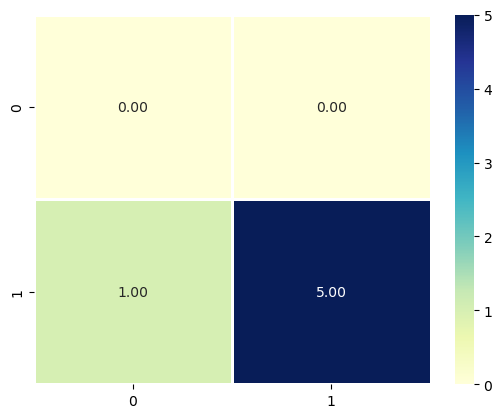

In [28]:
#logistic regression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.02, train_size=0.8, random_state=12)

def modeling(model):
   
    logist = LogisticRegression()
    logist.fit(x_train, y_train)
    # Save trained models
    joblib.dump(logist, "logistic_model.joblib")
    pred = logist.predict(x_test)
    
    accuracy = accuracy_score(pred, y_test) * 100
    recall = recall_score(pred, y_test) * 100
    f_score = f1_score(pred, y_test) * 100
    
    print(f'Accuracy: {accuracy}, Recall: {recall}, F1: {f_score}')
    
    sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt='0.2f', cmap='YlGnBu', linewidths=1)

modeling(LogisticRegression())

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty norm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Train the model with grid search
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Save the best estimator
joblib.dump(best_estimator, "logistic_model_best.joblib")

# Make predictions on the test set using the best estimator
pred = best_estimator.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(pred, y_test) * 100
recall = recall_score(pred, y_test) * 100
f_score = f1_score(pred, y_test) * 100

print(f'Best parameters: {best_params}')
print(f'Accuracy: {accuracy}, Recall: {recall}, F1: {f_score}')


Best parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 83.33333333333334, Recall: 83.33333333333334, F1: 90.9090909090909


C:\Users\Elmnshawy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Elmnshawy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elmnshawy\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Elmnshawy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fi

# knn

In [30]:
#knn

from sklearn.neighbors import KNeighborsClassifier  
#Create KNN Object
knn = KNeighborsClassifier()

#Create x and y variable
x = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']

#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#Training the model
knn.fit(x_train, y_train)

#Predict testing set
y_pred = knn.predict(x_test)

#Check performance using accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#Check performance using roc
print("roc_auc_score:",roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7857142857142857
roc_auc_score: 0.7760416666666666
[[17  7]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.79      0.84      0.82        32

    accuracy                           0.79        56
   macro avg       0.78      0.78      0.78        56
weighted avg       0.78      0.79      0.78        56



In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Save trained model
joblib.dump(knn, "knn_model.joblib")

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator for prediction
y_pred = best_estimator.predict(x_test)

# Continue with evaluation as before
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
[[19  5]
 [ 5 27]]
Accuracy: 0.8214285714285714
roc_auc_score: 0.8177083333333333
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.84      0.84      0.84        32

    accuracy                           0.82        56
   macro avg       0.82      0.82      0.82        56
weighted avg       0.82      0.82      0.82        56



# NB

In [32]:
#naive bayas
# Step 2: Convert string values to numerical values using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X_encoded = ordinal_encoder.fit_transform(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.02, random_state=42)

# Step 4: Initialize the Gaussian Naive Bayes classifier
NB = GaussianNB()
# Step 5: Train the classifier
NB.fit(X_train, y_train)

# Save trained model
joblib.dump(NB, "NaiveBayes_model.joblib")

# Step 6: Make predictions on the test set
y_pred = NB.predict(X_test)
# Evaluate the classifier
print("train_data_acc =", NB.score(X_train, y_train) * 100)

# Step 7: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

train_data_acc = 67.88321167883211
Accuracy: 0.8333333333333334


In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    # Define the parameters you want to tune
    # Example:
    # 'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
# Evaluate the classifier
print("train_data_acc =", NB.score(X_train, y_train) * 100)


# Save the best estimator
joblib.dump(best_estimator, "NaiveBayes_best_model.joblib")

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


train_data_acc = 67.88321167883211
Accuracy: 0.8333333333333334


# RF

In [34]:
#randon forest 
rf=RandomForestClassifier(n_estimators=10,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=55)

rf.fit(X_train, y_train)

# Save trained model
joblib.dump(rf, "RF_model.joblib")

train_predictions = rf.predict(X_train)

# Calculate precision, recall, and F1-score for training data
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)
print("Training Precision: {:.2f}".format(precision_train))
print("Training Recall: {:.2f}".format(recall_train))
print("Training F1-score: {:.2f}".format(f1_train))
#Confusion matrix and accuracy
accuracy_train = accuracy_score(y_train, train_predictions)
print("Training Accuracy: {:.2f}%".format(accuracy_train * 100))
conf_matrix_train = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix (Training):\n", conf_matrix_train)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
#Method of selecting samples for training each tree
bootstrap= [True, False]

# Define hyperparameters grid to search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
print(param_grid)
rf_Model=RandomForestClassifier()
rf_Grid= GridSearchCV(estimator=rf_Model,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_
#check Accuracy

print(f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')

rf.fit(X_test,y_test)
test_predictions = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, test_predictions)
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

Training Precision: 1.00
Training Recall: 0.99
Training F1-score: 1.00
Training Accuracy: 99.64%
Confusion Matrix (Training):
 [[123   0]
 [  1 150]]
{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Train Accuracy - : 0.836
Accuracy: 100.00%


# SVM

train_data_acc = 94.16058394160584
test_data_acc = 83.33333333333334
Precision: 0.6944444444444445
Recall: 0.8333333333333334
F1-score: 0.7575757575757575
Confusion Matrix:
 [[0 1]
 [0 5]]


C:\Users\Elmnshawy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


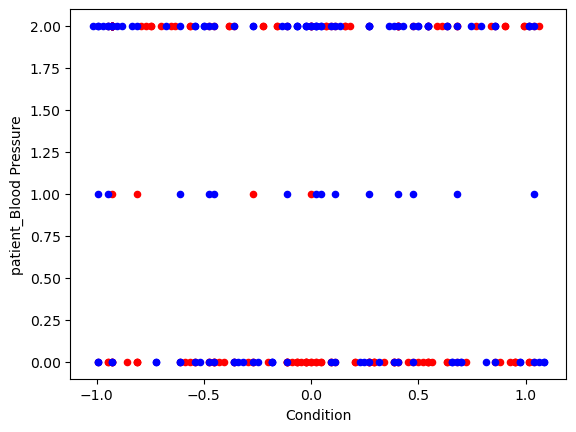

In [35]:
# svm
# Assuming you've imported the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already defined your DataFrame df, X, and y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=12)

# Initialize and train your SVM classifier
svm_classifier = SVC(kernel='rbf', C=1,gamma =1)
svm_classifier.fit(X_train, y_train)

# Save trained model
joblib.dump(svm_classifier, "svm_model.joblib")

# Evaluate the classifier
print("train_data_acc =", svm_classifier.score(X_train, y_train) * 100)

# Subset your DataFrame into positive and negative classes
positive_df = df[df['Outcome Variable'] == 1].iloc[0:300]
negative_df = df[df['Outcome Variable'] == 0].iloc[0:300]

# Assuming 'Condition' and 'patient_Blood Pressure' are columns in your DataFrame
axes = positive_df.plot(kind='scatter', x='Condition', y='patient_Blood Pressure', color='red')
negative_df.plot(kind='scatter', x='Condition', y='patient_Blood Pressure', color='blue', ax=axes)

# Make predictions on test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("test_data_acc =", accuracy * 100)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


In [36]:
from sklearn.model_selection import GridSearchCV
import joblib


def svm_grid_search(X_train, y_train):
    # Define the parameter grid
    param_grid = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

    # Initialize SVM classifier
    svm_classifier = SVC()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print("Best parameters:", grid_search.best_params_)

    # Print the best estimator
    print("Best estimator:", grid_search.best_estimator_)

    # Print the best score
    print("Best score:", grid_search.best_score_)

    # Return the best estimator
    return grid_search.best_estimator_

# Assuming you have already defined your DataFrame df, X, and y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Perform grid search to find the best SVM classifier
best_svm_classifier = svm_grid_search(X_train, y_train)

# Save the best model
joblib.dump(best_svm_classifier, "best_svm_model.joblib")

# Make predictions on test data
y_pred = best_svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best estimator: SVC(C=1, gamma=1)
Best score: 0.6697979797979798
Accuracy: 0.8035714285714286
Precision: 0.8550170068027211
Recall: 0.8035714285714286
F1-score: 0.7906693762858146
Confusion Matrix:
 [[14 11]
 [ 0 31]]


# test dataset

In [17]:
# Read test dataset
test_data = pd.read_csv("D:/2aaaaaathirdimprtant/pattern/Test_Dataset_Disease_Classifier.csv")
# Load the saved preprocessing function
def preprocess_test_data(test_data):
    return preprocess_data(test_data)

# Apply the loaded preprocessing function to the new test dataset
preprocessed_test_data = preprocess_test_data(test_data)


# load models

In [37]:
# Load the saved models
NB = joblib.load("NaiveBayes_model.joblib")
logist = joblib.load("logistic_model.joblib")
knn = joblib.load("knn_model.joblib")
RF = joblib.load("RF_model.joblib")
svm=joblib.load("svm_model.joblib")
DT=joblib.load("DT_model.joblib")

# Separate features (X_test) and target variable (y_true)
X_test = preprocessed_test_data.drop(columns=['Outcome Variable'])
y_true = preprocessed_test_data['Outcome Variable']

#NB
NB_pred = NB.predict(X_test)
#accuracy
NB_acc=accuracy_score(y_true,NB_pred)

#DT
DT_pred = DT.predict(X_test)
#accuracy
DT_acc=accuracy_score(y_true,NB_pred)

#LR
LR_pred = logist.predict(X_test)
#accuracy
LR_acc=accuracy_score(y_true,LR_pred)

#knn
knn_pred=knn.predict(X_test)
#accuracy
knn_acc=accuracy_score(y_true,knn_pred)

#RF
RF_pred = RF.predict(X_test)
#accuracy
RF_acc=accuracy_score(y_true,RF_pred)

#svm
svm_pred = svm.predict(X_test)
#accuracy
svm_acc=accuracy_score(y_true,svm_pred)

print("Naive Bayes Accuracy:", NB_acc)
print("logistic regression Accuracy:", LR_acc)
print("knn  Accuracy:", knn_acc)
print("RF Accuracy:", RF_acc)
print("svm Accuracy:", svm_acc)
print("DT Accuracy:", DT_acc)

Naive Bayes Accuracy: 0.47
logistic regression Accuracy: 0.48
knn  Accuracy: 0.42
RF Accuracy: 0.43
svm Accuracy: 0.41
DT Accuracy: 0.47


C:\Users\Elmnshawy\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
